Course: Introduction to data visualization with Matplotlib

Link: https://learn.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib



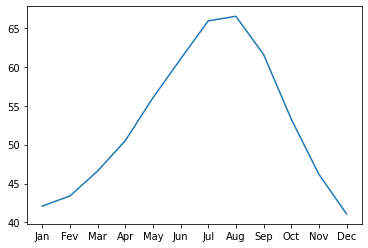

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

my_dict = {
    'MONTH' : ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'TEMPERATURE' : [42.1, 43.4, 46.6, 50.5, 56.0, 61.0, 65.9, 66.5, 61.6, 53.3, 46.2, 41.1]
}

import pandas as pd
df = pd.DataFrame(my_dict)

# Adding data to axes
ax.plot(df['MONTH'], df['TEMPERATURE'])
plt.show()


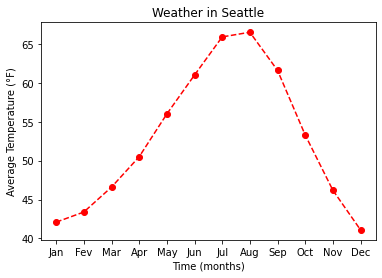

In [0]:
# Customizing plot
fig2, ax2 = plt.subplots()
ax2.plot(df['MONTH'], df['TEMPERATURE'],
         marker='o', # Other markers: 'v'
         linestyle='--',
         color='r') # Color red
ax2.set_xlabel('Time (months)')
ax2.set_ylabel('Average Temperature (°F)')
ax2.set_title('Weather in Seattle')
plt.show()



(3, 2)


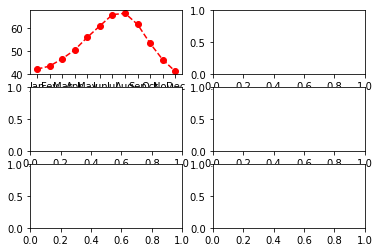

In [0]:
# Small mutiples - small plots
fig3, ax3 = plt.subplots(3, 2) # Create plot grid
print(ax3.shape) # Show plot format

ax3[0, 0].plot(df['MONTH'], df['TEMPERATURE'],
         marker='o', # Other markers: 'v'
         linestyle='--',
         color='r')
plt.show()


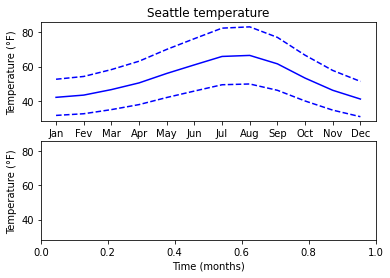

In [0]:
# Subplots with data
df['TEMPERATURE25MMIN'] = df['TEMPERATURE'] - df['TEMPERATURE']*0.25
df['TEMPERATURE25MAX'] = df['TEMPERATURE'] + df['TEMPERATURE']*0.25

fig4, ax4 = plt.subplots(2, 1, # Create plot grid
                         sharey=True) # sharey : Both plots with the same y range
ax4[0].plot(df['MONTH'], df['TEMPERATURE'], color='b')
ax4[0].plot(df['MONTH'], df['TEMPERATURE25MMIN'], linestyle='--', color='b')
ax4[0].plot(df['MONTH'], df['TEMPERATURE25MAX'], linestyle='--', color='b')

ax4[0].set_title('Seattle temperature')
ax4[1].set_xlabel('Time (months)')
ax4[0].set_ylabel('Temperature (°F)')
ax4[1].set_ylabel('Temperature (°F)')

plt.show()

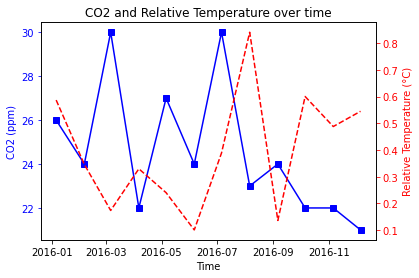

In [0]:
# Plotting time-series data with 
# different variables in the same plot (multiple y-axis)

import random
import pandas as pd
import matplotlib.pyplot as plt

list_time = []
co2 = [] 
rel_temp = []
for i in range(12):
    list_time.append('2016-'+str(i+1)+'-06')
    co2.append(random.randint(20,30))
    rel_temp.append(random.random())

my_dict = {
    'co2' : co2,
    'relative_temp' : rel_temp
}

climate_change = pd.DataFrame(my_dict)
climate_change.index = pd.to_datetime(list_time)
climate_change

# Preparing plot
fig, ax = plt.subplots()
ax.set_title('CO2 and Relative Temperature over time')

# First plot
ax.plot(climate_change.index, climate_change['co2'], marker='s', color='b')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color='b')
ax.tick_params('y', colors='b') # Change color of y-axis values

# Second plot
ax2 = ax.twinx() # Copy plot, keep same x-axis, but individual y-axis
ax2.plot(climate_change.index, climate_change['relative_temp'],
         linestyle='--', color='r')
ax2.set_ylabel('Relative Temperature (°C)', color='r')
ax2.tick_params('y', colors='r')

plt.show()


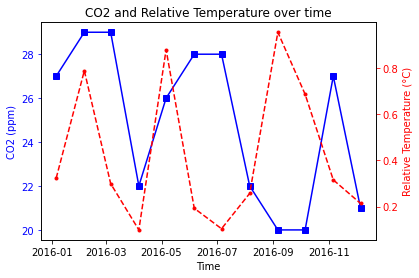

In [0]:
# Defining plot function for time-series
def plot_timeseries(axes, x, y, 
                    color, linestyle, marker, 
                    xlabel, ylabel):
    axes.plot(x, y, color=color, linestyle=linestyle, marker=marker)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

# Preparing plot
fig, ax = plt.subplots()
ax.set_title('CO2 and Relative Temperature over time')

plot_timeseries(ax, climate_change.index, climate_change['co2'],
                'b', '-', 's', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx() # Copy plot, keep same x-axis, but individual y-axis
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'],
                'r', '--', '.', 'Time', 'Relative Temperature (°C)')

plt.show()


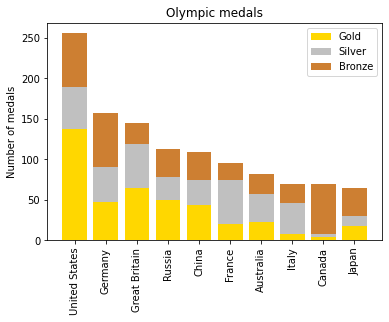

In [0]:
# Bar chart
import pandas as pd
medals = pd.DataFrame([[ 67, 137,  52],
       [ 67,  47,  43],
       [ 26,  64,  55],
       [ 35,  50,  28],
       [ 35,  44,  30],
       [ 21,  20,  55],
       [ 25,  23,  34],
       [ 24,   8,  38],
       [ 61,   4,   4],
       [ 34,  17,  13]])
medals.index = ['United States', 'Germany', 'Great Britain', 'Russia', 'China', 'France', 'Australia', 'Italy', 'Canada', 'Japan']
medals.columns = ['Bronze', 'Gold', 'Silver']

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.bar(medals.index, medals["Gold"], 
       label="Gold", color=('#ffd700'))
ax.bar(medals.index, medals["Silver"], 
       bottom=medals["Gold"], 
       label="Silver", color=('#C0C0C0'))
ax.bar(medals.index, medals["Bronze"], 
       bottom=medals["Gold"] + medals["Silver"], 
       label="Bronze", color=('#cd7f32'))

ax.set_title('2016 Olympic medals')
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of medals")
ax.legend()

plt.show()


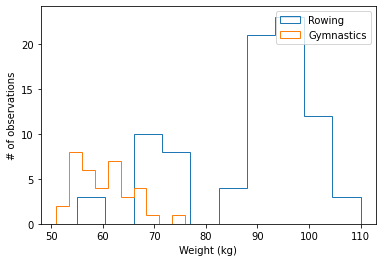

In [0]:
# Histograms

men_rowing_weight = pd.DataFrame([ 90.,  71.,  70.,  73.,  90., 100.,  89.,  93.,  84.,  94.,  70.,
        86.,  70.,  87., 102., 102.,  98.,  96., 104.,  88.,  92.,  95.,
        97.,  92.,  92.,  76.,  95.,  92.,  55.,  74.,  93.,  90., 100.,
        73.,  94.,  94.,  93.,  73.,  88.,  90.,  92.,  95.,  97.,  93.,
        93.,  97.,  96.,  98.,  96.,  71.,  93.,  70.,  70.,  71.,  95.,
       101., 100.,  98., 110., 100., 100.,  55., 110.,  87.,  98., 100.,
        75., 100.,  95.,  93.,  70.,  69., 105.,  95.,  75.,  97.,  94.,
        93.,  95.,  95.,  90.,  55., 102.,  73.])
men_rowing_weight.columns=['Weight']
mens_gymnastics_weight = pd.DataFrame([62., 62., 62., 55., 55., 58., 62., 68., 54., 65., 68., 68., 60.,
       61., 65., 70., 67., 62., 54., 51., 51., 76., 59., 58., 54., 54.,
       55., 55., 56., 56., 56., 60., 58., 60., 61., 65.]) 
mens_gymnastics_weight.columns=['Weight']

fig, ax = plt.subplots()
ax.hist(men_rowing_weight['Weight'], label='Rowing', histtype='step')
ax.hist(mens_gymnastics_weight['Weight'], label='Gymnastics', histtype='step')

ax.set_xlabel('Weight (kg)')
ax.set_ylabel('# of observations')
ax.legend()
plt.show()



In [0]:
#@title Default title text
# Scatter plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

co2 = pd.DataFrame([315.71, 317.45, 317.5 , np.nan, 315.86, 314.93, 313.2 ,    np.nan,
       313.33, 314.67, 315.62, 316.38, 316.71, 317.72, 318.29, 318.15,
       316.54, 314.8 , 313.84, 313.26, 314.8 , 315.58, 316.43, 316.97,
       317.58, 319.02, 320.03, 319.59, 318.18, 315.91, 314.16, 313.83,
       315.  , 316.19, 316.93, 317.7 , 318.54, 319.48, 320.58, 319.77,
       318.57, 316.79, 314.8 , 315.38, 316.1 , 317.01, 317.94, 318.56,
       319.68, 320.63, 321.01, 320.55, 319.58, 317.4 , 316.26, 315.42,
       316.69, 317.69, 318.74, 319.08, 319.86, 321.39, 322.25, 321.47,
       319.74, 317.77, 316.21, 315.99, 317.12, 318.31, 319.57,    np.nan,
          np.nan,    np.nan, 322.25, 321.89, 320.44, 318.7 , 316.7 , 316.79,
       317.79, 318.71, 319.44, 320.44, 320.89, 322.13, 322.16, 321.87,
       321.39, 318.81, 317.81, 317.3 , 318.87, 319.42, 320.62, 321.59,
       322.39, 323.87, 324.01, 323.75, 322.39, 320.37, 318.64, 318.1 ,
       319.79, 321.08, 322.07, 322.5 , 323.04, 324.42, 325.  , 324.09,
       322.55, 320.92, 319.31, 319.31, 320.72, 321.96, 322.57, 323.15,
       323.89, 325.02, 325.57, 325.36, 324.14, 322.03, 320.41, 320.25,
       321.31, 322.84, 324.  , 324.42, 325.64, 326.66, 327.34, 326.76,
       325.88, 323.67, 322.38, 321.78, 322.85, 324.11, 325.03, 325.99,
       326.87, 328.13, 328.07, 327.66, 326.35, 324.69, 323.1 , 323.16,
       323.98, 325.13, 326.17, 326.68, 327.18, 327.78, 328.92, 328.57,
       327.34, 325.46, 323.36, 323.57, 324.8 , 326.01, 326.77, 327.63,
       327.75, 329.72, 330.07, 329.09, 328.05, 326.32, 324.93, 325.06,
       326.5 , 327.55, 328.54, 329.56, 330.3 , 331.5 , 332.48, 332.07,
       330.87, 329.31, 327.51, 327.18, 328.16, 328.64, 329.35, 330.71,
       331.48, 332.65, 333.2 , 332.16, 331.07, 329.12, 327.32, 327.28,
       328.3 , 329.58, 330.73, 331.46, 331.9 , 333.17, 333.94, 333.45,
       331.98, 329.95, 328.5 , 328.35, 329.37,    np.nan, 331.59, 332.75,
       333.52, 334.64, 334.77, 334.  , 333.06, 330.68, 328.95, 328.75,
       330.15, 331.62, 332.66, 333.13, 334.95, 336.13, 336.93, 336.17,
       334.88, 332.56, 331.29, 331.27, 332.41, 333.6 , 334.95, 335.25,
       336.66, 337.69, 338.03, 338.01, 336.41, 334.41, 332.37, 332.41,
       333.75, 334.9 , 336.14, 336.69, 338.27, 338.95, 339.21, 339.26,
       337.54, 335.75, 333.98, 334.19, 335.31, 336.81, 337.9 , 338.34,
       340.01, 340.93, 341.48, 341.33, 339.4 , 337.7 , 336.19, 336.15,
       337.27, 338.32, 339.29, 340.55, 341.61, 342.53, 343.03, 342.54,
       340.78, 338.44, 336.95, 337.08, 338.58, 339.88, 340.96, 341.73,
       342.81, 343.97, 344.63, 343.79, 342.32, 340.09, 338.28, 338.29,
       339.6 , 340.9 , 341.68, 342.9 , 343.33, 345.25, 346.03, 345.63,
       344.19, 342.27, 340.35, 340.38, 341.59, 343.05, 344.1 , 344.79,
       345.52,    np.nan, 347.63, 346.97, 345.53, 343.55, 341.4 , 341.67,
       343.1 , 344.7 , 345.21, 346.16, 347.74, 348.34, 349.06, 348.38,
       346.71, 345.02, 343.27, 343.13, 344.49, 345.88, 346.56, 347.28,
       348.01, 349.77, 350.38, 349.93, 348.16, 346.08, 345.22, 344.51,
       345.93, 347.22, 348.52, 348.73, 349.73, 351.31, 352.09, 351.53,
       350.11, 348.08, 346.52, 346.59, 347.96, 349.16, 350.39, 351.64,
       352.41, 353.69, 354.21, 353.72, 352.69, 350.4 , 348.92, 349.13,
       350.2 , 351.41, 352.91, 353.27, 353.96, 355.64, 355.86, 355.37,
       353.99, 351.81, 350.05, 350.25, 351.49, 352.85, 353.8 , 355.04,
       355.73, 356.32, 357.32, 356.34, 354.84, 353.01, 351.31, 351.62,
       353.07, 354.33, 354.84, 355.73, 357.23, 358.66, 359.13, 358.13,
       356.19, 353.85, 352.25, 352.35, 353.81, 355.12, 356.25, 357.11,
       357.86, 359.09, 359.59, 359.33, 357.01, 354.94, 352.96, 353.32,
       354.32, 355.57, 357.  , 357.31, 358.47, 359.27, 360.19, 359.52,
       357.33, 355.64, 354.03, 354.12, 355.41, 356.91, 358.24, 358.92,
       359.99, 361.23, 361.65, 360.81, 359.38, 357.46, 355.73, 356.07,
       357.53, 358.98, 359.92, 360.86, 361.83, 363.3 , 363.69, 363.19,
       361.64, 359.12, 358.17, 357.99, 359.45, 360.68, 362.07, 363.24,
       364.17, 364.57, 365.13, 364.92, 363.55, 361.38, 359.54, 359.58,
       360.89, 362.24, 363.09, 364.03, 364.51, 366.35, 366.64, 365.59,
       364.31, 362.25, 360.29, 360.82, 362.49, 364.38, 365.26, 365.98,
       367.24, 368.66, 369.42, 368.99, 367.82, 365.95, 364.02, 364.4 ,
       365.52, 367.13, 368.18, 369.07, 369.68, 370.99, 370.96, 370.3 ,
       369.45, 366.9 , 364.81, 365.37, 366.72, 368.1 , 369.29, 369.54,
       370.6 , 371.81, 371.58, 371.7 , 369.86, 368.13, 367.  , 367.03,
       368.37, 369.67, 370.59, 371.51, 372.43, 373.37, 373.85, 373.21,
       371.51, 369.61, 368.18, 368.45, 369.76, 371.24, 372.53, 373.2 ,
       374.12, 375.02, 375.76, 375.52, 374.01, 371.85, 370.75, 370.55,
       372.25, 373.79, 374.88, 375.64, 376.45, 377.73, 378.6 , 378.28,
       376.7 , 374.38, 373.17, 373.14, 374.66, 375.99, 377.  , 377.87,
       378.88, 380.35, 380.62, 379.69, 377.47, 376.01, 374.25, 374.46,
       376.16, 377.51, 378.46, 379.73, 380.77, 382.29, 382.45, 382.21,
       380.74, 378.74, 376.7 , 377.  , 378.35, 380.11, 381.38, 382.19,
       382.67, 384.61, 385.03, 384.05, 382.46, 380.41, 378.85, 379.13,
       380.15, 381.82, 382.89, 383.9 , 384.58, 386.5 , 386.56, 386.1 ,
       384.5 , 381.99, 380.96, 381.12, 382.45, 383.95, 385.52, 385.82,
       386.03, 387.21, 388.54, 387.76, 386.36, 384.09, 383.18, 382.99,
       384.19, 385.56, 386.94, 387.48, 388.82, 389.55, 390.14, 389.48,
       388.03, 386.11, 384.74, 384.43, 386.02, 387.42, 388.71, 390.2 ,
       391.17, 392.46, 393.  , 392.15, 390.2 , 388.35, 386.85, 387.24,
       388.67, 389.79, 391.33, 391.86, 392.6 , 393.25, 394.19, 393.73,
       392.51, 390.13, 389.08, 389.  , 390.28, 391.86, 393.12, 393.86,
       394.4 , 396.18, 396.74, 395.71, 394.36, 392.39, 391.11, 391.05,
       392.98, 394.34, 395.55, 396.8 , 397.43, 398.41, 399.78, 398.61,
       397.32, 395.2 , 393.45, 393.7 , 395.16, 396.84, 397.85, 398.01,
       399.77, 401.38, 401.78, 401.25, 399.1 , 397.03, 395.38, 396.03,
       397.28, 398.91, 399.98, 400.28, 401.54, 403.28, 403.96, 402.8 ,
       401.31, 398.93, 397.63, 398.29, 400.16, 401.85, 402.56, 404.12,
       404.87, 407.45, 407.72, 406.83, 404.41, 402.27, 401.05, 401.59,
       403.55, 404.45])

relative_temp = pd.DataFrame([ 0.1 ,  0.01,  0.08, -0.05,  0.06, -0.06, -0.03,  0.04,  0.02,
        0.01,  0.06,  0.09,  0.19,  0.16,  0.06,  0.02,  0.06, -0.01,
       -0.06, -0.09, -0.09, -0.03, -0.01,  0.14, -0.36, -0.16, -0.08,
        0.01, -0.02, -0.01,  0.05,  0.07, -0.11,  0.18,  0.07,  0.18,
        0.09,  0.15,  0.13,  0.12, -0.03,  0.02,  0.05,  0.  ,  0.03,
       -0.15,  0.08,  0.14,  0.12,  0.05, -0.06,  0.06, -0.02, -0.02,
       -0.01, -0.03,  0.06, -0.01, -0.03,  0.19, -0.13, -0.05, -0.09,
        0.03,  0.08,  0.25,  0.2 ,  0.15,  0.15,  0.  , -0.06, -0.12,
       -0.22, -0.3 , -0.25, -0.07, -0.07, -0.2 , -0.28, -0.3 , -0.21,
       -0.3 , -0.09, -0.17, -0.11, -0.2 , -0.14, -0.08, -0.12, -0.01,
       -0.15, -0.04, -0.06, -0.05, -0.16,  0.  ,  0.04, -0.13, -0.1 ,
        0.02,  0.09, -0.1 , -0.01, -0.15, -0.02, -0.06, -0.06, -0.2 ,
        0.03, -0.05,  0.14, -0.08,  0.01,  0.02, -0.04,  0.06, -0.06,
       -0.02, -0.23, -0.15,  0.21, -0.05, -0.1 , -0.06, -0.11, -0.11,
       -0.18,  0.12, -0.04, -0.14, -0.11, -0.14,  0.  ,  0.19,  0.2 ,
        0.05, -0.01,  0.03,  0.1 ,  0.11,  0.12,  0.27,  0.09,  0.22,
        0.08,  0.09, -0.05, -0.03, -0.04, -0.11,  0.11,  0.05,  0.01,
       -0.13, -0.02, -0.2 , -0.18, -0.09, -0.06, -0.18, -0.12, -0.03,
       -0.01, -0.05, -0.04, -0.08, -0.24, -0.17,  0.02, -0.01, -0.03,
        0.04,  0.02,  0.18,  0.03,  0.09,  0.03,  0.18,  0.28,  0.3 ,
        0.26,  0.25,  0.26,  0.16,  0.09,  0.02,  0.06,  0.12,  0.06,
       -0.06, -0.14, -0.28, -0.05, -0.1 , -0.01, -0.05, -0.03,  0.12,
       -0.12, -0.07, -0.07, -0.09,  0.07,  0.07,  0.14,  0.06,  0.16,
       -0.02, -0.03, -0.2 , -0.03, -0.09, -0.16, -0.17,  0.  , -0.06,
       -0.21, -0.1 , -0.23, -0.15, -0.12, -0.18, -0.09, -0.26, -0.06,
        0.09,  0.18,  0.2 ,  0.25,  0.27,  0.3 ,  0.25,  0.23,  0.19,
        0.02,  0.04,  0.2 ,  0.05,  0.08,  0.14,  0.21,  0.15,  0.07,
       -0.03,  0.07, -0.18,  0.05,  0.  ,  0.16,  0.11,  0.14, -0.09,
        0.19,  0.13,  0.06,  0.14,  0.03,  0.14,  0.27,  0.26,  0.29,
        0.47,  0.3 ,  0.42,  0.29,  0.32,  0.34,  0.16,  0.28,  0.24,
        0.21,  0.2 ,  0.3 ,  0.21,  0.56,  0.41,  0.48,  0.32,  0.25,
        0.31,  0.35,  0.35,  0.17,  0.13,  0.21,  0.4 ,  0.09,  0.14,
       -0.01,  0.1 ,  0.16,  0.05,  0.13,  0.08,  0.15,  0.13,  0.14,
        0.43,  0.52,  0.4 ,  0.42,  0.3 ,  0.35,  0.18,  0.15,  0.3 ,
        0.38,  0.15,  0.3 ,  0.17,  0.3 ,  0.17,  0.29,  0.08,  0.33,
        0.04,  0.16,  0.15,  0.2 ,  0.15,  0.04, -0.06,  0.21, -0.06,
        0.17,  0.11,  0.17,  0.17,  0.  ,  0.15,  0.14,  0.11,  0.09,
        0.15,  0.3 ,  0.39,  0.29,  0.26,  0.26,  0.12,  0.13,  0.12,
        0.02,  0.14,  0.11,  0.16,  0.36,  0.46,  0.17,  0.24,  0.26,
        0.36,  0.46,  0.28,  0.39,  0.32,  0.25,  0.47,  0.57,  0.42,
        0.49,  0.45,  0.44,  0.42,  0.35,  0.46,  0.42,  0.4 ,  0.13,
        0.34,  0.16,  0.35,  0.36,  0.33,  0.17,  0.15,  0.34,  0.36,
        0.37,  0.32,  0.21,  0.37,  0.41,  0.41,  0.76,  0.55,  0.46,
        0.38,  0.44,  0.3 ,  0.3 ,  0.43,  0.46,  0.42,  0.42,  0.51,
        0.36,  0.53,  0.39,  0.54,  0.51,  0.42,  0.5 ,  0.32,  0.31,
        0.33,  0.45,  0.42,  0.47,  0.24,  0.32,  0.24,  0.13,  0.1 ,
        0.01,  0.11,  0.04,  0.22,  0.37,  0.39,  0.36,  0.28,  0.26,
        0.24,  0.28,  0.13,  0.11,  0.24,  0.07,  0.19,  0.3 ,  0.04,
        0.26,  0.41,  0.29,  0.42,  0.32,  0.23,  0.32,  0.42,  0.46,
        0.36,  0.5 ,  0.77,  0.45,  0.47,  0.29,  0.45,  0.49,  0.48,
        0.34,  0.49,  0.45,  0.3 ,  0.27,  0.5 ,  0.34,  0.38,  0.3 ,
        0.27,  0.37,  0.49,  0.27,  0.2 ,  0.42,  0.41,  0.33,  0.37,
        0.52,  0.38,  0.39,  0.55,  0.35,  0.43,  0.56,  0.64,  0.66,
        0.6 ,  0.61,  0.9 ,  0.63,  0.64,  0.71,  0.78,  0.71,  0.68,
        0.45,  0.47,  0.5 ,  0.56,  0.48,  0.66,  0.34,  0.34,  0.33,
        0.37,  0.41,  0.34,  0.43,  0.43,  0.42,  0.46,  0.26,  0.58,
        0.6 ,  0.59,  0.4 ,  0.44,  0.42,  0.43,  0.42,  0.3 ,  0.34,
        0.3 ,  0.44,  0.46,  0.58,  0.52,  0.59,  0.55,  0.61,  0.49,
        0.56,  0.52,  0.7 ,  0.55,  0.75,  0.76,  0.91,  0.58,  0.65,
        0.54,  0.62,  0.55,  0.65,  0.57,  0.59,  0.43,  0.73,  0.55,
        0.57,  0.55,  0.62,  0.49,  0.55,  0.66,  0.66,  0.75,  0.55,
        0.75,  0.59,  0.71,  0.64,  0.62,  0.42,  0.43,  0.26,  0.45,
        0.53,  0.66,  0.72,  0.52,  0.72,  0.58,  0.69,  0.69,  0.65,
        0.67,  0.66,  0.63,  0.78,  0.8 ,  0.76,  0.68,  0.57,  0.7 ,
        0.63,  0.5 ,  0.47,  0.64,  0.54,  0.72,  0.64,  0.69,  0.72,
        0.77,  0.96,  0.7 ,  0.7 ,  0.76,  0.67,  0.58,  0.62,  0.6 ,
        0.64,  0.6 ,  0.57,  0.5 ,  0.24,  0.36,  0.73,  0.53,  0.51,
        0.48,  0.6 ,  0.44,  0.65,  0.67,  0.66,  0.54,  0.62,  0.53,
        0.53,  0.61,  0.65,  0.65,  0.72,  0.66,  0.7 ,  0.64,  0.77,
        0.65,  0.73,  0.78,  0.92,  0.87,  0.75,  0.64,  0.62,  0.65,
        0.61,  0.71,  0.79,  0.49,  0.51,  0.53,  0.64,  0.65,  0.53,
        0.59,  0.73,  0.73,  0.56,  0.66,  0.56,  0.54,  0.46,  0.49,
        0.58,  0.69,  0.76,  0.62,  0.57,  0.63,  0.76,  0.78,  0.75,
        0.53,  0.68,  0.55,  0.66,  0.52,  0.61,  0.65,  0.59,  0.66,
        0.78,  0.69,  0.81,  0.67,  0.73,  0.51,  0.77,  0.78,  0.87,
        0.66,  0.57,  0.82,  0.9 ,  0.85,  0.67,  0.79,  0.81,  0.86,
        0.9 ,  0.74,  0.78,  0.78,  0.71,  0.78,  0.81,  1.06,  1.04,
        1.11,  1.17,  1.35,  1.3 ,  1.09,  0.93,  0.76,  0.83,  0.98,
        0.87,  0.89,  0.93,  0.81])

climate_change = pd.DataFrame()
climate_change['relative_temp'] = relative_temp[0]
climate_change['co2'] = co2[0]

climate_change.index = pd.to_datetime(['1958-03-06T00:00:00.000000000', '1958-04-06T00:00:00.000000000',
       '1958-05-06T00:00:00.000000000', '1958-06-06T00:00:00.000000000',
       '1958-07-06T00:00:00.000000000', '1958-08-06T00:00:00.000000000',
       '1958-09-06T00:00:00.000000000', '1958-10-06T00:00:00.000000000',
       '1958-11-06T00:00:00.000000000', '1958-12-06T00:00:00.000000000',
       '1959-01-06T00:00:00.000000000', '1959-02-06T00:00:00.000000000',
       '1959-03-06T00:00:00.000000000', '1959-04-06T00:00:00.000000000',
       '1959-05-06T00:00:00.000000000', '1959-06-06T00:00:00.000000000',
       '1959-07-06T00:00:00.000000000', '1959-08-06T00:00:00.000000000',
       '1959-09-06T00:00:00.000000000', '1959-10-06T00:00:00.000000000',
       '1959-11-06T00:00:00.000000000', '1959-12-06T00:00:00.000000000',
       '1960-01-06T00:00:00.000000000', '1960-02-06T00:00:00.000000000',
       '1960-03-06T00:00:00.000000000', '1960-04-06T00:00:00.000000000',
       '1960-05-06T00:00:00.000000000', '1960-06-06T00:00:00.000000000',
       '1960-07-06T00:00:00.000000000', '1960-08-06T00:00:00.000000000',
       '1960-09-06T00:00:00.000000000', '1960-10-06T00:00:00.000000000',
       '1960-11-06T00:00:00.000000000', '1960-12-06T00:00:00.000000000',
       '1961-01-06T00:00:00.000000000', '1961-02-06T00:00:00.000000000',
       '1961-03-06T00:00:00.000000000', '1961-04-06T00:00:00.000000000',
       '1961-05-06T00:00:00.000000000', '1961-06-06T00:00:00.000000000',
       '1961-07-06T00:00:00.000000000', '1961-08-06T00:00:00.000000000',
       '1961-09-06T00:00:00.000000000', '1961-10-06T00:00:00.000000000',
       '1961-11-06T00:00:00.000000000', '1961-12-06T00:00:00.000000000',
       '1962-01-06T00:00:00.000000000', '1962-02-06T00:00:00.000000000',
       '1962-03-06T00:00:00.000000000', '1962-04-06T00:00:00.000000000',
       '1962-05-06T00:00:00.000000000', '1962-06-06T00:00:00.000000000',
       '1962-07-06T00:00:00.000000000', '1962-08-06T00:00:00.000000000',
       '1962-09-06T00:00:00.000000000', '1962-10-06T00:00:00.000000000',
       '1962-11-06T00:00:00.000000000', '1962-12-06T00:00:00.000000000',
       '1963-01-06T00:00:00.000000000', '1963-02-06T00:00:00.000000000',
       '1963-03-06T00:00:00.000000000', '1963-04-06T00:00:00.000000000',
       '1963-05-06T00:00:00.000000000', '1963-06-06T00:00:00.000000000',
       '1963-07-06T00:00:00.000000000', '1963-08-06T00:00:00.000000000',
       '1963-09-06T00:00:00.000000000', '1963-10-06T00:00:00.000000000',
       '1963-11-06T00:00:00.000000000', '1963-12-06T00:00:00.000000000',
       '1964-01-06T00:00:00.000000000', '1964-02-06T00:00:00.000000000',
       '1964-03-06T00:00:00.000000000', '1964-04-06T00:00:00.000000000',
       '1964-05-06T00:00:00.000000000', '1964-06-06T00:00:00.000000000',
       '1964-07-06T00:00:00.000000000', '1964-08-06T00:00:00.000000000',
       '1964-09-06T00:00:00.000000000', '1964-10-06T00:00:00.000000000',
       '1964-11-06T00:00:00.000000000', '1964-12-06T00:00:00.000000000',
       '1965-01-06T00:00:00.000000000', '1965-02-06T00:00:00.000000000',
       '1965-03-06T00:00:00.000000000', '1965-04-06T00:00:00.000000000',
       '1965-05-06T00:00:00.000000000', '1965-06-06T00:00:00.000000000',
       '1965-07-06T00:00:00.000000000', '1965-08-06T00:00:00.000000000',
       '1965-09-06T00:00:00.000000000', '1965-10-06T00:00:00.000000000',
       '1965-11-06T00:00:00.000000000', '1965-12-06T00:00:00.000000000',
       '1966-01-06T00:00:00.000000000', '1966-02-06T00:00:00.000000000',
       '1966-03-06T00:00:00.000000000', '1966-04-06T00:00:00.000000000',
       '1966-05-06T00:00:00.000000000', '1966-06-06T00:00:00.000000000',
       '1966-07-06T00:00:00.000000000', '1966-08-06T00:00:00.000000000',
       '1966-09-06T00:00:00.000000000', '1966-10-06T00:00:00.000000000',
       '1966-11-06T00:00:00.000000000', '1966-12-06T00:00:00.000000000',
       '1967-01-06T00:00:00.000000000', '1967-02-06T00:00:00.000000000',
       '1967-03-06T00:00:00.000000000', '1967-04-06T00:00:00.000000000',
       '1967-05-06T00:00:00.000000000', '1967-06-06T00:00:00.000000000',
       '1967-07-06T00:00:00.000000000', '1967-08-06T00:00:00.000000000',
       '1967-09-06T00:00:00.000000000', '1967-10-06T00:00:00.000000000',
       '1967-11-06T00:00:00.000000000', '1967-12-06T00:00:00.000000000',
       '1968-01-06T00:00:00.000000000', '1968-02-06T00:00:00.000000000',
       '1968-03-06T00:00:00.000000000', '1968-04-06T00:00:00.000000000',
       '1968-05-06T00:00:00.000000000', '1968-06-06T00:00:00.000000000',
       '1968-07-06T00:00:00.000000000', '1968-08-06T00:00:00.000000000',
       '1968-09-06T00:00:00.000000000', '1968-10-06T00:00:00.000000000',
       '1968-11-06T00:00:00.000000000', '1968-12-06T00:00:00.000000000',
       '1969-01-06T00:00:00.000000000', '1969-02-06T00:00:00.000000000',
       '1969-03-06T00:00:00.000000000', '1969-04-06T00:00:00.000000000',
       '1969-05-06T00:00:00.000000000', '1969-06-06T00:00:00.000000000',
       '1969-07-06T00:00:00.000000000', '1969-08-06T00:00:00.000000000',
       '1969-09-06T00:00:00.000000000', '1969-10-06T00:00:00.000000000',
       '1969-11-06T00:00:00.000000000', '1969-12-06T00:00:00.000000000',
       '1970-01-06T00:00:00.000000000', '1970-02-06T00:00:00.000000000',
       '1970-03-06T00:00:00.000000000', '1970-04-06T00:00:00.000000000',
       '1970-05-06T00:00:00.000000000', '1970-06-06T00:00:00.000000000',
       '1970-07-06T00:00:00.000000000', '1970-08-06T00:00:00.000000000',
       '1970-09-06T00:00:00.000000000', '1970-10-06T00:00:00.000000000',
       '1970-11-06T00:00:00.000000000', '1970-12-06T00:00:00.000000000',
       '1971-01-06T00:00:00.000000000', '1971-02-06T00:00:00.000000000',
       '1971-03-06T00:00:00.000000000', '1971-04-06T00:00:00.000000000',
       '1971-05-06T00:00:00.000000000', '1971-06-06T00:00:00.000000000',
       '1971-07-06T00:00:00.000000000', '1971-08-06T00:00:00.000000000',
       '1971-09-06T00:00:00.000000000', '1971-10-06T00:00:00.000000000',
       '1971-11-06T00:00:00.000000000', '1971-12-06T00:00:00.000000000',
       '1972-01-06T00:00:00.000000000', '1972-02-06T00:00:00.000000000',
       '1972-03-06T00:00:00.000000000', '1972-04-06T00:00:00.000000000',
       '1972-05-06T00:00:00.000000000', '1972-06-06T00:00:00.000000000',
       '1972-07-06T00:00:00.000000000', '1972-08-06T00:00:00.000000000',
       '1972-09-06T00:00:00.000000000', '1972-10-06T00:00:00.000000000',
       '1972-11-06T00:00:00.000000000', '1972-12-06T00:00:00.000000000',
       '1973-01-06T00:00:00.000000000', '1973-02-06T00:00:00.000000000',
       '1973-03-06T00:00:00.000000000', '1973-04-06T00:00:00.000000000',
       '1973-05-06T00:00:00.000000000', '1973-06-06T00:00:00.000000000',
       '1973-07-06T00:00:00.000000000', '1973-08-06T00:00:00.000000000',
       '1973-09-06T00:00:00.000000000', '1973-10-06T00:00:00.000000000',
       '1973-11-06T00:00:00.000000000', '1973-12-06T00:00:00.000000000',
       '1974-01-06T00:00:00.000000000', '1974-02-06T00:00:00.000000000',
       '1974-03-06T00:00:00.000000000', '1974-04-06T00:00:00.000000000',
       '1974-05-06T00:00:00.000000000', '1974-06-06T00:00:00.000000000',
       '1974-07-06T00:00:00.000000000', '1974-08-06T00:00:00.000000000',
       '1974-09-06T00:00:00.000000000', '1974-10-06T00:00:00.000000000',
       '1974-11-06T00:00:00.000000000', '1974-12-06T00:00:00.000000000',
       '1975-01-06T00:00:00.000000000', '1975-02-06T00:00:00.000000000',
       '1975-03-06T00:00:00.000000000', '1975-04-06T00:00:00.000000000',
       '1975-05-06T00:00:00.000000000', '1975-06-06T00:00:00.000000000',
       '1975-07-06T00:00:00.000000000', '1975-08-06T00:00:00.000000000',
       '1975-09-06T00:00:00.000000000', '1975-10-06T00:00:00.000000000',
       '1975-11-06T00:00:00.000000000', '1975-12-06T00:00:00.000000000',
       '1976-01-06T00:00:00.000000000', '1976-02-06T00:00:00.000000000',
       '1976-03-06T00:00:00.000000000', '1976-04-06T00:00:00.000000000',
       '1976-05-06T00:00:00.000000000', '1976-06-06T00:00:00.000000000',
       '1976-07-06T00:00:00.000000000', '1976-08-06T00:00:00.000000000',
       '1976-09-06T00:00:00.000000000', '1976-10-06T00:00:00.000000000',
       '1976-11-06T00:00:00.000000000', '1976-12-06T00:00:00.000000000',
       '1977-01-06T00:00:00.000000000', '1977-02-06T00:00:00.000000000',
       '1977-03-06T00:00:00.000000000', '1977-04-06T00:00:00.000000000',
       '1977-05-06T00:00:00.000000000', '1977-06-06T00:00:00.000000000',
       '1977-07-06T00:00:00.000000000', '1977-08-06T00:00:00.000000000',
       '1977-09-06T00:00:00.000000000', '1977-10-06T00:00:00.000000000',
       '1977-11-06T00:00:00.000000000', '1977-12-06T00:00:00.000000000',
       '1978-01-06T00:00:00.000000000', '1978-02-06T00:00:00.000000000',
       '1978-03-06T00:00:00.000000000', '1978-04-06T00:00:00.000000000',
       '1978-05-06T00:00:00.000000000', '1978-06-06T00:00:00.000000000',
       '1978-07-06T00:00:00.000000000', '1978-08-06T00:00:00.000000000',
       '1978-09-06T00:00:00.000000000', '1978-10-06T00:00:00.000000000',
       '1978-11-06T00:00:00.000000000', '1978-12-06T00:00:00.000000000',
       '1979-01-06T00:00:00.000000000', '1979-02-06T00:00:00.000000000',
       '1979-03-06T00:00:00.000000000', '1979-04-06T00:00:00.000000000',
       '1979-05-06T00:00:00.000000000', '1979-06-06T00:00:00.000000000',
       '1979-07-06T00:00:00.000000000', '1979-08-06T00:00:00.000000000',
       '1979-09-06T00:00:00.000000000', '1979-10-06T00:00:00.000000000',
       '1979-11-06T00:00:00.000000000', '1979-12-06T00:00:00.000000000',
       '1980-01-06T00:00:00.000000000', '1980-02-06T00:00:00.000000000',
       '1980-03-06T00:00:00.000000000', '1980-04-06T00:00:00.000000000',
       '1980-05-06T00:00:00.000000000', '1980-06-06T00:00:00.000000000',
       '1980-07-06T00:00:00.000000000', '1980-08-06T00:00:00.000000000',
       '1980-09-06T00:00:00.000000000', '1980-10-06T00:00:00.000000000',
       '1980-11-06T00:00:00.000000000', '1980-12-06T00:00:00.000000000',
       '1981-01-06T00:00:00.000000000', '1981-02-06T00:00:00.000000000',
       '1981-03-06T00:00:00.000000000', '1981-04-06T00:00:00.000000000',
       '1981-05-06T00:00:00.000000000', '1981-06-06T00:00:00.000000000',
       '1981-07-06T00:00:00.000000000', '1981-08-06T00:00:00.000000000',
       '1981-09-06T00:00:00.000000000', '1981-10-06T00:00:00.000000000',
       '1981-11-06T00:00:00.000000000', '1981-12-06T00:00:00.000000000',
       '1982-01-06T00:00:00.000000000', '1982-02-06T00:00:00.000000000',
       '1982-03-06T00:00:00.000000000', '1982-04-06T00:00:00.000000000',
       '1982-05-06T00:00:00.000000000', '1982-06-06T00:00:00.000000000',
       '1982-07-06T00:00:00.000000000', '1982-08-06T00:00:00.000000000',
       '1982-09-06T00:00:00.000000000', '1982-10-06T00:00:00.000000000',
       '1982-11-06T00:00:00.000000000', '1982-12-06T00:00:00.000000000',
       '1983-01-06T00:00:00.000000000', '1983-02-06T00:00:00.000000000',
       '1983-03-06T00:00:00.000000000', '1983-04-06T00:00:00.000000000',
       '1983-05-06T00:00:00.000000000', '1983-06-06T00:00:00.000000000',
       '1983-07-06T00:00:00.000000000', '1983-08-06T00:00:00.000000000',
       '1983-09-06T00:00:00.000000000', '1983-10-06T00:00:00.000000000',
       '1983-11-06T00:00:00.000000000', '1983-12-06T00:00:00.000000000',
       '1984-01-06T00:00:00.000000000', '1984-02-06T00:00:00.000000000',
       '1984-03-06T00:00:00.000000000', '1984-04-06T00:00:00.000000000',
       '1984-05-06T00:00:00.000000000', '1984-06-06T00:00:00.000000000',
       '1984-07-06T00:00:00.000000000', '1984-08-06T00:00:00.000000000',
       '1984-09-06T00:00:00.000000000', '1984-10-06T00:00:00.000000000',
       '1984-11-06T00:00:00.000000000', '1984-12-06T00:00:00.000000000',
       '1985-01-06T00:00:00.000000000', '1985-02-06T00:00:00.000000000',
       '1985-03-06T00:00:00.000000000', '1985-04-06T00:00:00.000000000',
       '1985-05-06T00:00:00.000000000', '1985-06-06T00:00:00.000000000',
       '1985-07-06T00:00:00.000000000', '1985-08-06T00:00:00.000000000',
       '1985-09-06T00:00:00.000000000', '1985-10-06T00:00:00.000000000',
       '1985-11-06T00:00:00.000000000', '1985-12-06T00:00:00.000000000',
       '1986-01-06T00:00:00.000000000', '1986-02-06T00:00:00.000000000',
       '1986-03-06T00:00:00.000000000', '1986-04-06T00:00:00.000000000',
       '1986-05-06T00:00:00.000000000', '1986-06-06T00:00:00.000000000',
       '1986-07-06T00:00:00.000000000', '1986-08-06T00:00:00.000000000',
       '1986-09-06T00:00:00.000000000', '1986-10-06T00:00:00.000000000',
       '1986-11-06T00:00:00.000000000', '1986-12-06T00:00:00.000000000',
       '1987-01-06T00:00:00.000000000', '1987-02-06T00:00:00.000000000',
       '1987-03-06T00:00:00.000000000', '1987-04-06T00:00:00.000000000',
       '1987-05-06T00:00:00.000000000', '1987-06-06T00:00:00.000000000',
       '1987-07-06T00:00:00.000000000', '1987-08-06T00:00:00.000000000',
       '1987-09-06T00:00:00.000000000', '1987-10-06T00:00:00.000000000',
       '1987-11-06T00:00:00.000000000', '1987-12-06T00:00:00.000000000',
       '1988-01-06T00:00:00.000000000', '1988-02-06T00:00:00.000000000',
       '1988-03-06T00:00:00.000000000', '1988-04-06T00:00:00.000000000',
       '1988-05-06T00:00:00.000000000', '1988-06-06T00:00:00.000000000',
       '1988-07-06T00:00:00.000000000', '1988-08-06T00:00:00.000000000',
       '1988-09-06T00:00:00.000000000', '1988-10-06T00:00:00.000000000',
       '1988-11-06T00:00:00.000000000', '1988-12-06T00:00:00.000000000',
       '1989-01-06T00:00:00.000000000', '1989-02-06T00:00:00.000000000',
       '1989-03-06T00:00:00.000000000', '1989-04-06T00:00:00.000000000',
       '1989-05-06T00:00:00.000000000', '1989-06-06T00:00:00.000000000',
       '1989-07-06T00:00:00.000000000', '1989-08-06T00:00:00.000000000',
       '1989-09-06T00:00:00.000000000', '1989-10-06T00:00:00.000000000',
       '1989-11-06T00:00:00.000000000', '1989-12-06T00:00:00.000000000',
       '1990-01-06T00:00:00.000000000', '1990-02-06T00:00:00.000000000',
       '1990-03-06T00:00:00.000000000', '1990-04-06T00:00:00.000000000',
       '1990-05-06T00:00:00.000000000', '1990-06-06T00:00:00.000000000',
       '1990-07-06T00:00:00.000000000', '1990-08-06T00:00:00.000000000',
       '1990-09-06T00:00:00.000000000', '1990-10-06T00:00:00.000000000',
       '1990-11-06T00:00:00.000000000', '1990-12-06T00:00:00.000000000',
       '1991-01-06T00:00:00.000000000', '1991-02-06T00:00:00.000000000',
       '1991-03-06T00:00:00.000000000', '1991-04-06T00:00:00.000000000',
       '1991-05-06T00:00:00.000000000', '1991-06-06T00:00:00.000000000',
       '1991-07-06T00:00:00.000000000', '1991-08-06T00:00:00.000000000',
       '1991-09-06T00:00:00.000000000', '1991-10-06T00:00:00.000000000',
       '1991-11-06T00:00:00.000000000', '1991-12-06T00:00:00.000000000',
       '1992-01-06T00:00:00.000000000', '1992-02-06T00:00:00.000000000',
       '1992-03-06T00:00:00.000000000', '1992-04-06T00:00:00.000000000',
       '1992-05-06T00:00:00.000000000', '1992-06-06T00:00:00.000000000',
       '1992-07-06T00:00:00.000000000', '1992-08-06T00:00:00.000000000',
       '1992-09-06T00:00:00.000000000', '1992-10-06T00:00:00.000000000',
       '1992-11-06T00:00:00.000000000', '1992-12-06T00:00:00.000000000',
       '1993-01-06T00:00:00.000000000', '1993-02-06T00:00:00.000000000',
       '1993-03-06T00:00:00.000000000', '1993-04-06T00:00:00.000000000',
       '1993-05-06T00:00:00.000000000', '1993-06-06T00:00:00.000000000',
       '1993-07-06T00:00:00.000000000', '1993-08-06T00:00:00.000000000',
       '1993-09-06T00:00:00.000000000', '1993-10-06T00:00:00.000000000',
       '1993-11-06T00:00:00.000000000', '1993-12-06T00:00:00.000000000',
       '1994-01-06T00:00:00.000000000', '1994-02-06T00:00:00.000000000',
       '1994-03-06T00:00:00.000000000', '1994-04-06T00:00:00.000000000',
       '1994-05-06T00:00:00.000000000', '1994-06-06T00:00:00.000000000',
       '1994-07-06T00:00:00.000000000', '1994-08-06T00:00:00.000000000',
       '1994-09-06T00:00:00.000000000', '1994-10-06T00:00:00.000000000',
       '1994-11-06T00:00:00.000000000', '1994-12-06T00:00:00.000000000',
       '1995-01-06T00:00:00.000000000', '1995-02-06T00:00:00.000000000',
       '1995-03-06T00:00:00.000000000', '1995-04-06T00:00:00.000000000',
       '1995-05-06T00:00:00.000000000', '1995-06-06T00:00:00.000000000',
       '1995-07-06T00:00:00.000000000', '1995-08-06T00:00:00.000000000',
       '1995-09-06T00:00:00.000000000', '1995-10-06T00:00:00.000000000',
       '1995-11-06T00:00:00.000000000', '1995-12-06T00:00:00.000000000',
       '1996-01-06T00:00:00.000000000', '1996-02-06T00:00:00.000000000',
       '1996-03-06T00:00:00.000000000', '1996-04-06T00:00:00.000000000',
       '1996-05-06T00:00:00.000000000', '1996-06-06T00:00:00.000000000',
       '1996-07-06T00:00:00.000000000', '1996-08-06T00:00:00.000000000',
       '1996-09-06T00:00:00.000000000', '1996-10-06T00:00:00.000000000',
       '1996-11-06T00:00:00.000000000', '1996-12-06T00:00:00.000000000',
       '1997-01-06T00:00:00.000000000', '1997-02-06T00:00:00.000000000',
       '1997-03-06T00:00:00.000000000', '1997-04-06T00:00:00.000000000',
       '1997-05-06T00:00:00.000000000', '1997-06-06T00:00:00.000000000',
       '1997-07-06T00:00:00.000000000', '1997-08-06T00:00:00.000000000',
       '1997-09-06T00:00:00.000000000', '1997-10-06T00:00:00.000000000',
       '1997-11-06T00:00:00.000000000', '1997-12-06T00:00:00.000000000',
       '1998-01-06T00:00:00.000000000', '1998-02-06T00:00:00.000000000',
       '1998-03-06T00:00:00.000000000', '1998-04-06T00:00:00.000000000',
       '1998-05-06T00:00:00.000000000', '1998-06-06T00:00:00.000000000',
       '1998-07-06T00:00:00.000000000', '1998-08-06T00:00:00.000000000',
       '1998-09-06T00:00:00.000000000', '1998-10-06T00:00:00.000000000',
       '1998-11-06T00:00:00.000000000', '1998-12-06T00:00:00.000000000',
       '1999-01-06T00:00:00.000000000', '1999-02-06T00:00:00.000000000',
       '1999-03-06T00:00:00.000000000', '1999-04-06T00:00:00.000000000',
       '1999-05-06T00:00:00.000000000', '1999-06-06T00:00:00.000000000',
       '1999-07-06T00:00:00.000000000', '1999-08-06T00:00:00.000000000',
       '1999-09-06T00:00:00.000000000', '1999-10-06T00:00:00.000000000',
       '1999-11-06T00:00:00.000000000', '1999-12-06T00:00:00.000000000',
       '2000-01-06T00:00:00.000000000', '2000-02-06T00:00:00.000000000',
       '2000-03-06T00:00:00.000000000', '2000-04-06T00:00:00.000000000',
       '2000-05-06T00:00:00.000000000', '2000-06-06T00:00:00.000000000',
       '2000-07-06T00:00:00.000000000', '2000-08-06T00:00:00.000000000',
       '2000-09-06T00:00:00.000000000', '2000-10-06T00:00:00.000000000',
       '2000-11-06T00:00:00.000000000', '2000-12-06T00:00:00.000000000',
       '2001-01-06T00:00:00.000000000', '2001-02-06T00:00:00.000000000',
       '2001-03-06T00:00:00.000000000', '2001-04-06T00:00:00.000000000',
       '2001-05-06T00:00:00.000000000', '2001-06-06T00:00:00.000000000',
       '2001-07-06T00:00:00.000000000', '2001-08-06T00:00:00.000000000',
       '2001-09-06T00:00:00.000000000', '2001-10-06T00:00:00.000000000',
       '2001-11-06T00:00:00.000000000', '2001-12-06T00:00:00.000000000',
       '2002-01-06T00:00:00.000000000', '2002-02-06T00:00:00.000000000',
       '2002-03-06T00:00:00.000000000', '2002-04-06T00:00:00.000000000',
       '2002-05-06T00:00:00.000000000', '2002-06-06T00:00:00.000000000',
       '2002-07-06T00:00:00.000000000', '2002-08-06T00:00:00.000000000',
       '2002-09-06T00:00:00.000000000', '2002-10-06T00:00:00.000000000',
       '2002-11-06T00:00:00.000000000', '2002-12-06T00:00:00.000000000',
       '2003-01-06T00:00:00.000000000', '2003-02-06T00:00:00.000000000',
       '2003-03-06T00:00:00.000000000', '2003-04-06T00:00:00.000000000',
       '2003-05-06T00:00:00.000000000', '2003-06-06T00:00:00.000000000',
       '2003-07-06T00:00:00.000000000', '2003-08-06T00:00:00.000000000',
       '2003-09-06T00:00:00.000000000', '2003-10-06T00:00:00.000000000',
       '2003-11-06T00:00:00.000000000', '2003-12-06T00:00:00.000000000',
       '2004-01-06T00:00:00.000000000', '2004-02-06T00:00:00.000000000',
       '2004-03-06T00:00:00.000000000', '2004-04-06T00:00:00.000000000',
       '2004-05-06T00:00:00.000000000', '2004-06-06T00:00:00.000000000',
       '2004-07-06T00:00:00.000000000', '2004-08-06T00:00:00.000000000',
       '2004-09-06T00:00:00.000000000', '2004-10-06T00:00:00.000000000',
       '2004-11-06T00:00:00.000000000', '2004-12-06T00:00:00.000000000',
       '2005-01-06T00:00:00.000000000', '2005-02-06T00:00:00.000000000',
       '2005-03-06T00:00:00.000000000', '2005-04-06T00:00:00.000000000',
       '2005-05-06T00:00:00.000000000', '2005-06-06T00:00:00.000000000',
       '2005-07-06T00:00:00.000000000', '2005-08-06T00:00:00.000000000',
       '2005-09-06T00:00:00.000000000', '2005-10-06T00:00:00.000000000',
       '2005-11-06T00:00:00.000000000', '2005-12-06T00:00:00.000000000',
       '2006-01-06T00:00:00.000000000', '2006-02-06T00:00:00.000000000',
       '2006-03-06T00:00:00.000000000', '2006-04-06T00:00:00.000000000',
       '2006-05-06T00:00:00.000000000', '2006-06-06T00:00:00.000000000',
       '2006-07-06T00:00:00.000000000', '2006-08-06T00:00:00.000000000',
       '2006-09-06T00:00:00.000000000', '2006-10-06T00:00:00.000000000',
       '2006-11-06T00:00:00.000000000', '2006-12-06T00:00:00.000000000',
       '2007-01-06T00:00:00.000000000', '2007-02-06T00:00:00.000000000',
       '2007-03-06T00:00:00.000000000', '2007-04-06T00:00:00.000000000',
       '2007-05-06T00:00:00.000000000', '2007-06-06T00:00:00.000000000',
       '2007-07-06T00:00:00.000000000', '2007-08-06T00:00:00.000000000',
       '2007-09-06T00:00:00.000000000', '2007-10-06T00:00:00.000000000',
       '2007-11-06T00:00:00.000000000', '2007-12-06T00:00:00.000000000',
       '2008-01-06T00:00:00.000000000', '2008-02-06T00:00:00.000000000',
       '2008-03-06T00:00:00.000000000', '2008-04-06T00:00:00.000000000',
       '2008-05-06T00:00:00.000000000', '2008-06-06T00:00:00.000000000',
       '2008-07-06T00:00:00.000000000', '2008-08-06T00:00:00.000000000',
       '2008-09-06T00:00:00.000000000', '2008-10-06T00:00:00.000000000',
       '2008-11-06T00:00:00.000000000', '2008-12-06T00:00:00.000000000',
       '2009-01-06T00:00:00.000000000', '2009-02-06T00:00:00.000000000',
       '2009-03-06T00:00:00.000000000', '2009-04-06T00:00:00.000000000',
       '2009-05-06T00:00:00.000000000', '2009-06-06T00:00:00.000000000',
       '2009-07-06T00:00:00.000000000', '2009-08-06T00:00:00.000000000',
       '2009-09-06T00:00:00.000000000', '2009-10-06T00:00:00.000000000',
       '2009-11-06T00:00:00.000000000', '2009-12-06T00:00:00.000000000',
       '2010-01-06T00:00:00.000000000', '2010-02-06T00:00:00.000000000',
       '2010-03-06T00:00:00.000000000', '2010-04-06T00:00:00.000000000',
       '2010-05-06T00:00:00.000000000', '2010-06-06T00:00:00.000000000',
       '2010-07-06T00:00:00.000000000', '2010-08-06T00:00:00.000000000',
       '2010-09-06T00:00:00.000000000', '2010-10-06T00:00:00.000000000',
       '2010-11-06T00:00:00.000000000', '2010-12-06T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', '2011-02-06T00:00:00.000000000',
       '2011-03-06T00:00:00.000000000', '2011-04-06T00:00:00.000000000',
       '2011-05-06T00:00:00.000000000', '2011-06-06T00:00:00.000000000',
       '2011-07-06T00:00:00.000000000', '2011-08-06T00:00:00.000000000',
       '2011-09-06T00:00:00.000000000', '2011-10-06T00:00:00.000000000',
       '2011-11-06T00:00:00.000000000', '2011-12-06T00:00:00.000000000',
       '2012-01-06T00:00:00.000000000', '2012-02-06T00:00:00.000000000',
       '2012-03-06T00:00:00.000000000', '2012-04-06T00:00:00.000000000',
       '2012-05-06T00:00:00.000000000', '2012-06-06T00:00:00.000000000',
       '2012-07-06T00:00:00.000000000', '2012-08-06T00:00:00.000000000',
       '2012-09-06T00:00:00.000000000', '2012-10-06T00:00:00.000000000',
       '2012-11-06T00:00:00.000000000', '2012-12-06T00:00:00.000000000',
       '2013-01-06T00:00:00.000000000', '2013-02-06T00:00:00.000000000',
       '2013-03-06T00:00:00.000000000', '2013-04-06T00:00:00.000000000',
       '2013-05-06T00:00:00.000000000', '2013-06-06T00:00:00.000000000',
       '2013-07-06T00:00:00.000000000', '2013-08-06T00:00:00.000000000',
       '2013-09-06T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
       '2013-11-06T00:00:00.000000000', '2013-12-06T00:00:00.000000000',
       '2014-01-06T00:00:00.000000000', '2014-02-06T00:00:00.000000000',
       '2014-03-06T00:00:00.000000000', '2014-04-06T00:00:00.000000000',
       '2014-05-06T00:00:00.000000000', '2014-06-06T00:00:00.000000000',
       '2014-07-06T00:00:00.000000000', '2014-08-06T00:00:00.000000000',
       '2014-09-06T00:00:00.000000000', '2014-10-06T00:00:00.000000000',
       '2014-11-06T00:00:00.000000000', '2014-12-06T00:00:00.000000000',
       '2015-01-06T00:00:00.000000000', '2015-02-06T00:00:00.000000000',
       '2015-03-06T00:00:00.000000000', '2015-04-06T00:00:00.000000000',
       '2015-05-06T00:00:00.000000000', '2015-06-06T00:00:00.000000000',
       '2015-07-06T00:00:00.000000000', '2015-08-06T00:00:00.000000000',
       '2015-09-06T00:00:00.000000000', '2015-10-06T00:00:00.000000000',
       '2015-11-06T00:00:00.000000000', '2015-12-06T00:00:00.000000000',
       '2016-01-06T00:00:00.000000000', '2016-02-06T00:00:00.000000000',
       '2016-03-06T00:00:00.000000000', '2016-04-06T00:00:00.000000000',
       '2016-05-06T00:00:00.000000000', '2016-06-06T00:00:00.000000000',
       '2016-07-06T00:00:00.000000000', '2016-08-06T00:00:00.000000000',
       '2016-09-06T00:00:00.000000000', '2016-10-06T00:00:00.000000000',
       '2016-11-06T00:00:00.000000000', '2016-12-06T00:00:00.000000000'])
climate_change.head(5)

,relative_temp,co2
1958-03-06,0.10,315.71
1958-04-06,0.01,317.45
1958-05-06,0.08,317.50
1958-06-06,-0.05,NaN
1958-07-06,0.06,315.86


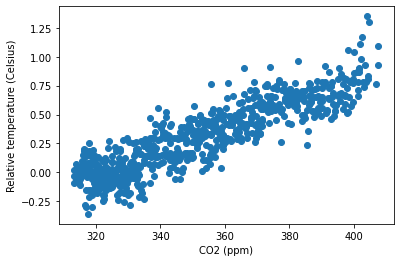

In [0]:
# Scatter Plot
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()

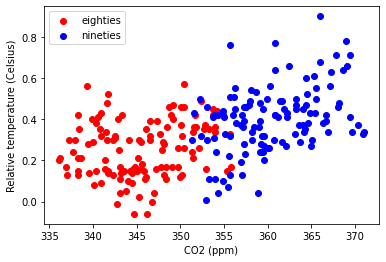

In [0]:
# Scatter Plot
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]

fig, ax = plt.subplots()
ax.scatter(eighties["co2"], eighties["relative_temp"], color="red", label="eighties")
ax.scatter(nineties["co2"], nineties["relative_temp"], color="blue", label="nineties")

ax.legend()
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

plt.show()

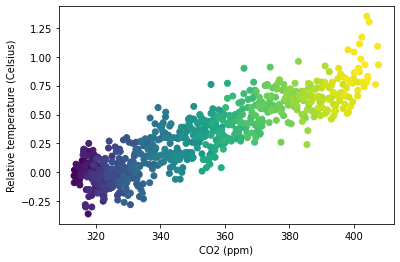

In [0]:
# Scatter Plot
fig, ax = plt.subplots()

ax.scatter(climate_change["co2"], climate_change["relative_temp"],c=climate_change.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

plt.show()

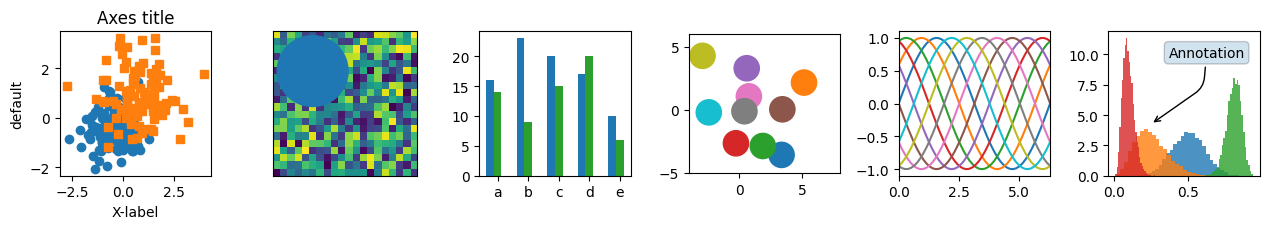

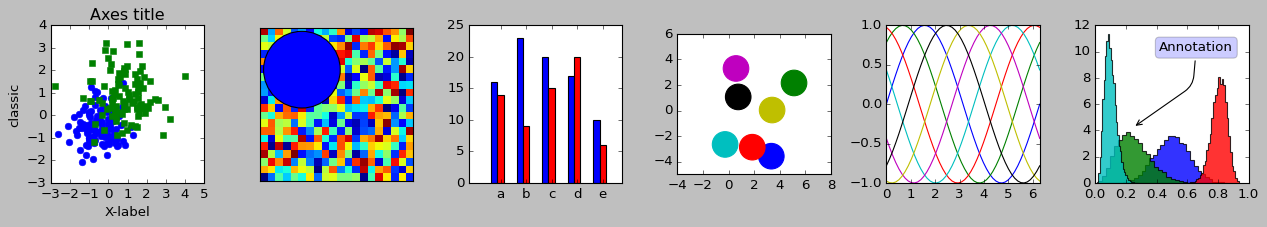

In [0]:
# Changing figure style
# https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot.
    """
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    ax.set_xlabel('X-label')
    ax.set_title('Axes title')
    return ax


def plot_colored_sinusoidal_lines(ax):
    """Plot sinusoidal lines with colors following the style color cycle.
    """
    L = 2 * np.pi
    x = np.linspace(0, L)
    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shift = np.linspace(0, L, nb_colors, endpoint=False)
    for s in shift:
        ax.plot(x, np.sin(x + s), '-')
    ax.set_xlim([x[0], x[-1]])
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels.
    """
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color='C2')
    ax.set_xticks(x + width)
    ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'], range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))
    # Force the limits to be the same across the styles (because different
    # styles may have different numbers of available colors).
    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch.
    """
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation='none')
    c = plt.Circle((5, 5), radius=5, label='patch')
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation.
    """
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30,
                alpha=0.8, density=True)
    # Add a small annotation.
    ax.annotate('Annotation', xy=(0.25, 4.25),
                xytext=(0.9, 0.9), textcoords=ax.transAxes,
                va="top", ha="right",
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(
                          arrowstyle="->",
                          connectionstyle="angle,angleA=-95,angleB=35,rad=10"),
                )
    return ax


def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style.
    """
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    # Tweak the figure size to be better suited for a row of numerous plots:
    # double the width and halve the height. NB: use relative changes because
    # some styles may have a figure size different from the default one.
    (fig_width, fig_height) = plt.rcParams['figure.figsize']
    fig_size = [fig_width * 2, fig_height / 2]

    fig, axs = plt.subplots(ncols=6, nrows=1, num=style_label,
                            figsize=fig_size, squeeze=True)
    axs[0].set_ylabel(style_label)

    plot_scatter(axs[0], prng)
    plot_image_and_patch(axs[1], prng)
    plot_bar_graphs(axs[2], prng)
    plot_colored_circles(axs[3], prng)
    plot_colored_sinusoidal_lines(axs[4])
    plot_histograms(axs[5], prng)

    fig.tight_layout()

    return fig


if __name__ == "__main__":

    # Setup a list of all available styles, in alphabetical order but
    # the `default` and `classic` ones, which will be forced resp. in
    # first and second position.
    
    #style_list = ['default', 'classic'] + sorted(
    #    style for style in plt.style.available if style != 'classic')

    style_list = ['default', 'classic']

    # Plot a demonstration figure for every available style sheet.
    for style_label in style_list:
        with plt.style.context(style_label):
            fig = plot_figure(style_label=style_label)
            fig.savefig('plot.png')

    plt.show()


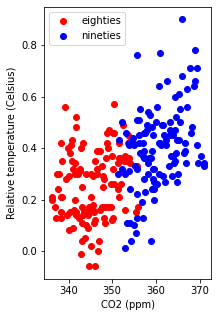

In [0]:
# Saving files
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]

fig, ax = plt.subplots()
ax.scatter(eighties["co2"], eighties["relative_temp"], color="red", label="eighties")
ax.scatter(nineties["co2"], nineties["relative_temp"], color="blue", label="nineties")

ax.legend()
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

fig.savefig('relativeTemp_CO2.png')
fig.savefig('relativeTemp_CO2-high.png', dpi=300) # dots por inch
fig.savefig('relativeTemp_CO2.jpg')
fig.savefig('relativeTemp_CO2-low.jpg', quality=50)
fig.savefig('relativeTemp_CO2.svg')

# Change figure aspect ratio
#fig.set_size_inches([5, 3])
fig.set_size_inches([3, 5])
plt.show()

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics']


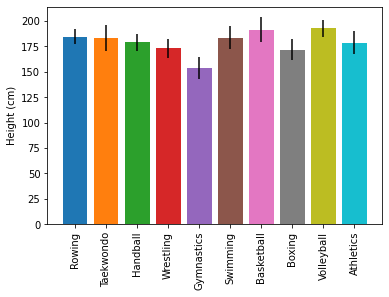

In [0]:
# Automating figures from data
import pandas as pd
import matplotlib.pyplot as plt

height = pd.DataFrame([198., 165., 182., 170., 161., 161., 161., 197., 198., 178., 172.,
       164., 188., 193., 198., 198., 198., 198., 180., 192., 165., 163.,
       191., 190., 207., 170., 185., 172., 173., 160., 183., 202., 203.,
       198., 180., 152., 186., 183., 166., 164., 183., 173., 183., 166.,
       166., 180., 178., 193., 173., 173., 195., 178., 185., 203., 183.,
       171., 166., 190., 188., 181., 185., 183., 197., 191., 178., 170.,
       170., 187., 173., 165., 165., 179., 207., 196., 186., 167., 170.,
       143., 143., 143., 143., 143., 202., 210., 175., 187., 180., 182.,
       170., 170., 180., 197., 172., 186., 170., 196., 196., 196., 189.,
       198., 190., 193., 199., 160., 193., 184., 175., 175., 175., 196.,
       183., 187., 198., 178., 175., 170., 190., 185., 174., 172., 187.,
       206., 201., 175., 175., 175., 191., 173., 176., 179., 179., 186.,
       186., 168., 175., 175., 181., 176., 188., 170., 185., 178., 176.,
       174., 193., 193., 193., 172., 193., 175., 153., 153., 170., 198.,
       197., 188., 182., 186., 179., 206., 181., 188., 180., 173., 180.,
       186., 180., 187., 171., 193., 170., 191., 196., 210., 180., 201.,
       188., 176., 187., 188., 171., 183., 173., 169., 168., 176., 176.,
       176., 172., 195., 172., 180., 170., 163., 185., 201., 184., 184.,
       184., 173.])
sport = pd.DataFrame(['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics',
       'Gymnastics', 'Gymnastics', 'Swimming', 'Basketball', 'Taekwondo',
       'Rowing', 'Boxing', 'Volleyball', 'Athletics', 'Swimming',
       'Swimming', 'Swimming', 'Swimming', 'Athletics', 'Wrestling',
       'Boxing', 'Athletics', 'Volleyball', 'Wrestling', 'Taekwondo',
       'Athletics', 'Taekwondo', 'Handball', 'Boxing', 'Wrestling',
       'Rowing', 'Volleyball', 'Basketball', 'Volleyball', 'Athletics',
       'Boxing', 'Volleyball', 'Handball', 'Wrestling', 'Athletics',
       'Athletics', 'Swimming', 'Basketball', 'Athletics', 'Athletics',
       'Handball', 'Rowing', 'Athletics', 'Swimming', 'Swimming',
       'Swimming', 'Volleyball', 'Rowing', 'Basketball', 'Rowing',
       'Swimming', 'Athletics', 'Athletics', 'Rowing', 'Athletics',
       'Boxing', 'Rowing', 'Taekwondo', 'Athletics', 'Wrestling',
       'Swimming', 'Swimming', 'Rowing', 'Boxing', 'Gymnastics',
       'Gymnastics', 'Rowing', 'Rowing', 'Swimming', 'Rowing',
       'Wrestling', 'Rowing', 'Gymnastics', 'Gymnastics', 'Gymnastics',
       'Gymnastics', 'Gymnastics', 'Volleyball', 'Basketball',
       'Basketball', 'Athletics', 'Athletics', 'Handball', 'Swimming',
       'Swimming', 'Handball', 'Basketball', 'Taekwondo', 'Rowing',
       'Wrestling', 'Athletics', 'Athletics', 'Athletics', 'Rowing',
       'Athletics', 'Rowing', 'Rowing', 'Volleyball', 'Wrestling',
       'Volleyball', 'Rowing', 'Athletics', 'Athletics', 'Athletics',
       'Volleyball', 'Athletics', 'Rowing', 'Athletics', 'Athletics',
       'Rowing', 'Swimming', 'Volleyball', 'Boxing', 'Wrestling',
       'Handball', 'Volleyball', 'Volleyball', 'Basketball', 'Basketball',
       'Athletics', 'Athletics', 'Basketball', 'Swimming', 'Taekwondo',
       'Athletics', 'Swimming', 'Swimming', 'Swimming', 'Athletics',
       'Swimming', 'Swimming', 'Rowing', 'Athletics', 'Rowing',
       'Athletics', 'Basketball', 'Basketball', 'Athletics', 'Wrestling',
       'Swimming', 'Swimming', 'Swimming', 'Wrestling', 'Basketball',
       'Athletics', 'Athletics', 'Athletics', 'Athletics', 'Volleyball',
       'Handball', 'Swimming', 'Rowing', 'Taekwondo', 'Boxing',
       'Basketball', 'Athletics', 'Athletics', 'Athletics', 'Athletics',
       'Rowing', 'Rowing', 'Volleyball', 'Rowing', 'Boxing', 'Swimming',
       'Swimming', 'Athletics', 'Swimming', 'Basketball', 'Wrestling',
       'Athletics', 'Rowing', 'Basketball', 'Basketball', 'Swimming',
       'Wrestling', 'Basketball', 'Basketball', 'Handball', 'Athletics',
       'Athletics', 'Athletics', 'Athletics', 'Rowing', 'Basketball',
       'Handball', 'Athletics', 'Wrestling', 'Gymnastics', 'Taekwondo',
       'Basketball', 'Swimming', 'Swimming', 'Rowing', 'Athletics'])
summer_2016_medals = pd.DataFrame()
summer_2016_medals['height'] = height[0]
summer_2016_medals['sport'] = sport[0]

unique_sports = sport[0].unique()
print(unique_sports)

# Plot one bar for each sport branch
fig, ax = plt.subplots()
for s in unique_sports:
    sport_df = summer_2016_medals[summer_2016_medals['sport'] == s]
    ax.bar(s, sport_df['height'].mean(), yerr=sport_df['height'].std())

ax.set_ylabel('Height (cm)')
ax.set_xticklabels(unique_sports, rotation=90)
plt.show()
